In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd Desktop/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1656193072866.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,06/24/2022,3911.74,--,3821.75,3913.65,3821.75
1,06/23/2022,3795.73,--,3774.71,3802.58,3743.52
2,06/22/2022,3759.89,--,3733.89,3801.79,3717.69
3,06/21/2022,3764.79,--,3715.31,3779.65,3715.31
4,06/17/2022,3674.84,--,3665.90,3707.71,3636.87
...,...,...,...,...,...,...
2545,06/29/2012,1362.16,--,1330.12,1362.17,1330.12
2546,06/28/2012,1329.04,--,1331.52,1331.52,1313.29
2547,06/27/2012,1331.85,--,1320.71,1334.40,1320.71
2548,06/26/2012,1319.99,--,1314.09,1324.24,1310.30


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2550.000000,2550.000000,2550.000000,2550.000000
mean,2602.009235,2578.531337,2591.803808,2564.009694
std,874.274240,917.820609,923.665016,911.080526
min,1313.720000,0.000000,0.000000,0.000000
25%,1978.122500,1970.427500,1980.252500,1959.927500
50%,2406.890000,2407.045000,2417.695000,2393.900000
75%,2994.600000,2995.437500,3005.740000,2977.205000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,2612.717886,2612.338065,2625.784549,2597.626031
std,874.422901,874.696440,880.389430,868.099973
min,1313.720000,1314.090000,1324.240000,1309.270000
25%,1984.130000,1983.290000,1989.660000,1974.370000
50%,2429.330000,2430.780000,2439.550000,2415.700000
75%,3002.100000,3002.430000,3013.920000,2985.200000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2549
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Volume      2517 non-null   object 
 3   Open        2517 non-null   float64
 4   High        2517 non-null   float64
 5   Low         2517 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.6+ KB


In [5]:
df.shape

(2517, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

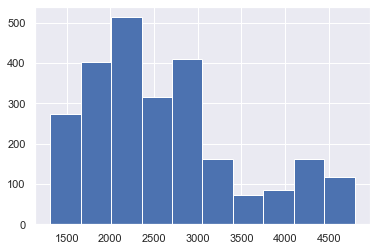

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

3911.74

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2612.717886372675

In [10]:
close_sd = df['Close/Last'].std()
close_sd

874.4229014171104

In [11]:
sigma1 = close_mean + close_sd
sigma1

3487.1407877897855

In [12]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4361.563689206896

In [13]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5235.986590624007

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2549
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2012-06-25 to 2022-06-24')

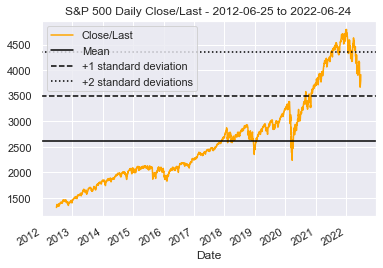

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2012-06-25 to 2022-06-24')

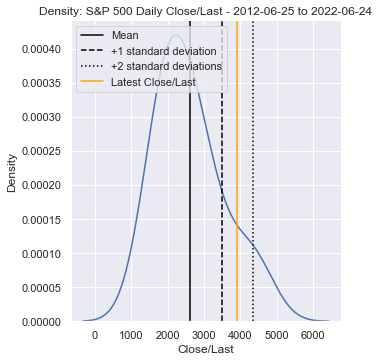

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.4855765002518793